In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
studentPerformance = pd.read_csv('../data/StudentsPerformance.csv',dtype='unicode')
studentPerformance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#lets take a look at some values
import matplotlib.pyplot as plt

In [4]:
#turns out, scores are 'objects', need to convert over
studentPerformance['math score'] = pd.to_numeric(studentPerformance['math score'])
studentPerformance['reading score'] = pd.to_numeric(studentPerformance['reading score'])
studentPerformance['writing score'] = pd.to_numeric(studentPerformance['writing score'])

In [5]:
studentPerformance[['math score','reading score','writing score']]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [6]:
#using 75% as cutoff for what counts as 'good'
studentPerformance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
types = ['math','reading','writing']
for t in types:
    studentPerformance[t + ' score good'] = studentPerformance[t+ ' score']>75
studentPerformance = studentPerformance.convert_dtypes()
studentPerformance.dtypes

gender                          string
race/ethnicity                  string
parental level of education     string
lunch                           string
test preparation course         string
math score                       Int64
reading score                    Int64
writing score                    Int64
math score good                boolean
reading score good             boolean
writing score good             boolean
dtype: object

In [8]:
#majority vote for if score is good
studentPerformance['good score'] = studentPerformance.mode( axis = 1)[0].astype(bool)
studentPerformance = studentPerformance.convert_dtypes()
studentPerformance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score good,reading score good,writing score good,good score
0,female,group B,bachelor's degree,standard,none,72,72,74,False,False,False,False
1,female,group C,some college,standard,completed,69,90,88,False,True,True,True
2,female,group B,master's degree,standard,none,90,95,93,True,True,True,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,False,False,False,False
4,male,group C,some college,standard,none,76,78,75,True,True,False,True


In [9]:
def createMap(column):
    keys = list(column.unique())
    values = list(range(len(keys)))
    dictionary = dict(zip(keys,values))
    return dictionary

In [10]:
#getting non target values
X = studentPerformance.iloc[:,0:5]
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [11]:
#converts string data to numerical
encodedX = X.copy()
for column in encodedX:
    mapping = createMap(encodedX[column])
    encodedX[column].replace(mapping,inplace = True)

encodedX.astype('int')
encodedX.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,0,0,0,0,0
1,0,1,1,0,1
2,0,0,2,0,0
3,1,2,3,1,0
4,1,1,1,0,0


In [12]:
y = studentPerformance['good score']
encodedY = y.copy()
mapping = createMap(encodedY)
encodedY.replace(mapping,inplace = True)

In [13]:
X_train,X_test,y_train,y_test = train_test_split( 
    encodedX, encodedY, test_size = 0.3,random_state = 1,stratify = y ) 
#stratify lets the proportion of class labels in training and test be the same


In [14]:
clf = DecisionTreeClassifier(criterion = 'entropy',
                             max_depth = 3,
                             random_state =1 )
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

[Text(334.8, 570.7800000000001, 'test preparation course <= 0.5\nentropy = 0.91\nsamples = 700\nvalue = [472, 228]\nclass = Good'),
 Text(167.4, 407.70000000000005, 'lunch <= 0.5\nentropy = 0.804\nsamples = 448\nvalue = [338, 110]\nclass = Good'),
 Text(83.7, 244.62, 'gender <= 0.5\nentropy = 0.888\nsamples = 285\nvalue = [198, 87]\nclass = Good'),
 Text(41.85, 81.53999999999996, 'entropy = 0.973\nsamples = 139\nvalue = [83, 56]\nclass = Good'),
 Text(125.55000000000001, 81.53999999999996, 'entropy = 0.746\nsamples = 146\nvalue = [115, 31]\nclass = Good'),
 Text(251.10000000000002, 244.62, 'gender <= 0.5\nentropy = 0.587\nsamples = 163\nvalue = [140, 23]\nclass = Good'),
 Text(209.25, 81.53999999999996, 'entropy = 0.718\nsamples = 91\nvalue = [73, 18]\nclass = Good'),
 Text(292.95, 81.53999999999996, 'entropy = 0.364\nsamples = 72\nvalue = [67, 5]\nclass = Good'),
 Text(502.20000000000005, 407.70000000000005, 'gender <= 0.5\nentropy = 0.997\nsamples = 252\nvalue = [134, 118]\nclass = G

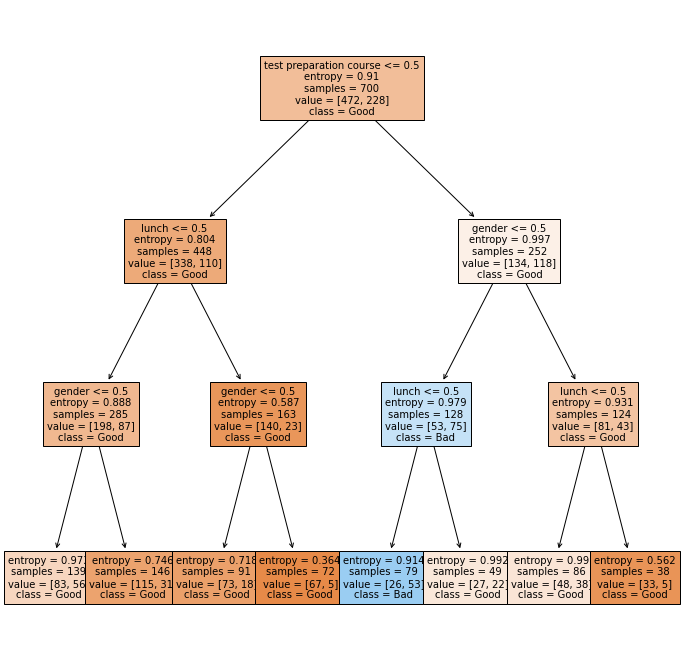

In [15]:
from sklearn import tree
plt.figure(figsize=(12,12))
tree.plot_tree(clf,
              feature_names = X.columns,
              class_names = ['Good','Bad'],
              filled=True,
              fontsize = 10)

In [16]:
from sklearn import metrics
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6833333333333333
